# Skapa index av flera variabler

När man har flera variabler som mäter ungefär samma sak kan det vara motiverat att göra ett *index*. Det är en sammanfattande variabel som visar till exempel en sammanlagd poäng, eller ett genomsnitt av de olika variablerna. En fördel är till exempel att mätfel i de enskilda variablerna kan tar ut varandra, och man får ett bättre mått på den underliggande egenskap man egentligen är intresserad av.

Säg till exempel att vi vill mäta en persons kunskap i vetenskapsfrågor. Det finns ingen enskild fråga som skulle kunna fånga in allt. Om vi frågar "vad är minst, elektronen eller atomen" (rätt svar är elektronen!) är det troligt att de som kan mer om vetenskap oftare svarar rätt. Men även den som inte kan så mycket kan ha råkat höra just detta, och den i allmänhet kunnige kanske har missat just denna faktauppgift. Genom att ställa många frågor och väga samman svaren borde vi få ett bättre mått på allmän kunskap om vetenskap.

I den här guiden ska vi gå igenom hur man gör två enkla index över just kunskap om vetenskap, och hur man kan kolla hur väl de olika frågorna i indexet hänger ihop.

## Steg 1: Koda om variablerna som ska ingå i indexet

Vi använder oss här av den amerikanska General Social Survey, där man ställer flera frågor om grundläggande vetenskapliga fakta. Vi börjar med att ladda in datan.

In [4]:
use "data/GSS2018.dta", clear

När man gör ett index måste man först koda om variablerna så att de alla är enhetliga. Om vi till exempel lägger ihop en variabel med skalan 1-4 med en variabel som har skala 1-10 blir det konstigt.

Vi ska utgå från fem frågor. 1) Vad är minst, elektronen eller atomen? 2) Snurrar jorden runt solen, eller solen runt jorden? 3) Rör kontinentalplattorna på sig? 4) Dödar antibiotika virus? 5) Fungerar laser genom att fokusera ljudvågor?

Variablerna är kodade så att 1 är "true" och 2 "false". Vi är bara intresserade av om man har svarat rätt eller fel, och gör därför en uppsättning nya variabler som har värdet 0 om respondenten svarat fel, och 1 om den svarat rätt. Detta gör vi med kommandot [`recode`](recodings_sv.html). De nya variablerna heter "c_" och så vad frågan handlade om.

In [5]:
recode electron (1 = 1) (2=0), gen(c_electron)
recode earthsun (1 = 1) (2=0), gen(c_earthsun)
recode condrift (1 = 1) (2=0), gen(c_condrift)
recode viruses (1 = 0) (2=1), gen(c_viruses)
recode lasers (1 = 0) (2=1), gen(c_lasers)


(293 differences between electron and c_electron)

(281 differences between earthsun and c_earthsun)

(140 differences between condrift and c_condrift)

(1109 differences between viruses and c_viruses)

(777 differences between lasers and c_lasers)


Vi kan först titta på medelvärdena för de olika variablerna, för att se hur många som har rätt. Det kan vi till exempel göra med `sum`-kommandot. Vi skriver bara `sum c_*` så körs kommandot på alla variabler som börjar med c_.

In [7]:
sum c_*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  c_electron |        837    .6499403    .4772736          0          1
  c_earthsun |      1,117    .7484333    .4341078          0          1
  c_condrift |      1,063    .8682973    .3383265          0          1
   c_viruses |      1,109    .5383228    .4987541          0          1
    c_lasers |        777    .6718147    .4698551          0          1


Eftersom variablerna bara har värdet 0 eller 1 betyder ett medelvärde på 0.5 att 50% har rätt. Den svåraste frågan var tydligen om antibiotika dödar virus (det gör den inte), där 54% svarade rätt. Lättast var frågan om kontinentalplattornas rörelser, som 87% hade rätt på. Nu när alla variablerna har samma skala kan vi göra själva indexet.

## Steg 2a: Slå ihop variablerna till ett additivt index
Det första indexet vi gör är det enklast tänkbara: En summering av variablerna. Den som svarar fel på alla frågor får 0 poäng, den som svarar rätt på alla får fem poäng. Vi gör det med kommandot `gen` för att göra en ny variabel, som skapas genom att addera ihop alla de enskilda variablerna. Därefter tar vi fram ett `histogram` för att se hur många rätt folk har.


(1,783 missing values generated)

(bin=23, start=0, width=.2173913)


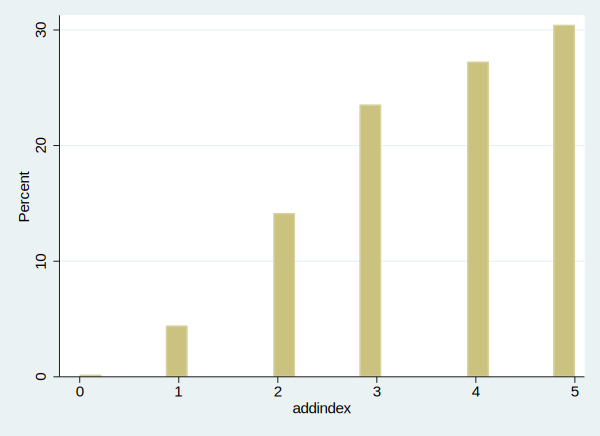

In [12]:
gen addindex = c_electron + c_earthsun + c_condrift + c_viruses + c_lasers
histogram addindex, percent

Nu har vi fått en skala som mäter vetenskapskunskap. Bara några enstaka hade alla fel (om man chansar borde man i genomsnitt få 2,5 poäng). Ungefär 30% hade alla rätt.

Nu går skalan från 0 till 5. Om vi istället hade velat att den skulle gå från 0 till 1, för att visa hur stor andel av frågorna man svarade rätt på, kan vi bara dela variabeln på 5. Då hade koden sett ut som nedan, men det hade egentligen inte förändrat något väsentligt. Rangordningen mellan personerna hade varit exakt densamma.

In [13]:
gen addindex_01 = (c_electron + c_earthsun + c_condrift + c_viruses + c_lasers)/5

(1,783 missing values generated)


## Steg 2b: Ta genomsnittet på variablerna
En begränsning med den ovanstående metoden är vi bara får med personer som svarat på alla frågorna. Den som har missing på en enda fråga får inget värde på indexet. Så trots att det var som minst 777 personer som svarade på en enskild fråga så blir det bara 565 personer som har ett värde på indexet.

Ett alternativ är därför att ta genomsnittet på alla variabler som personen svarat på. Fördelen är att vi får fler personer. Nackdelen är att det blir en delvis orättvis jämförelse. Att bara svara på en fråga och svara rätt på den är inte samma sak som att svara rätt på fem frågor. Därför är det viktigt att tänka igenom vad exakt det är man vill att indexet ska mäta.

För att skapa indexet på det här viset använder vi kommandot `egen` - en utbyggd variant av `gen` - kombinerat med `rowmean()`. Här ska man inte ha plustecken mellan variablerna, utan räknar bara upp dem. Vi skriver såhär, och gör sedan ett histogram:


(1182 missing values generated)

(bin=30, start=0, width=.03333333)


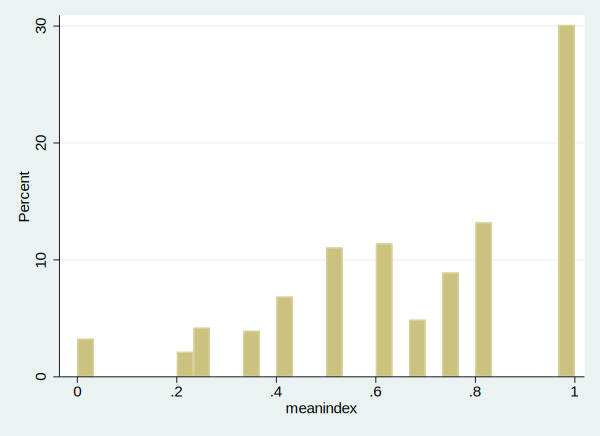

In [20]:
egen meanindex = rowmean(c_electron c_earthsun c_condrift c_viruses c_lasers)
histogram meanindex, percent

Man kan nu se att det är många fler olika värden, och fördelningen ser annorlunda ut. Det är fler som har värdet 0, eftersom det nu kan vara folk som bara svarat på några frågor, och svarat fel på dem. Men nu är det 1166 personer som har ett värde på indexet.

## Steg 3: Kolla hur väl variablerna i indexet hänger ihop
Man kan göra ett index av olika anledningar. I det här exemplet var syftet att se hur kunniga folk var om vetenskap. Då spelar det ingen roll om frågorna "hänger ihop", det vill säga är korrelerade. Den som har rätt på alla frågor kan mest, den som svarat rätt på tre frågor kan lite mindre, och det är inte mer med det.

Men om det är så att man vill åt någon underliggande attityd, till exempel en ideologi, kan det vara viktigt att kolla så att frågorna korrelerar. Vi kanske har valt ut fem frågor som vi tycker mäter vänster/höger-ideologi, men det visar sig att en av frågorna sticker ut. Svaret på den frågan hänger inte ihop med svaret på de andra. Då bör den inte ingå i indexet.

Det första man kan göra är att undersöka korrelationerna mellan variablerna i en korrelationsmatris. Vi skriver då bara `pwcorr` följt av listan på variablerna.

In [22]:
pwcorr c_electron c_earthsun c_condrift c_viruses c_lasers


             | c_elec~n c_eart~n c_cond~t c_viru~s c_lasers
-------------+---------------------------------------------
  c_electron |   1.0000 
  c_earthsun |   0.0615   1.0000 
  c_condrift |   0.0857   0.1299   1.0000 
   c_viruses |   0.0931   0.2131   0.0959   1.0000 
    c_lasers |   0.0989   0.2260   0.0913   0.2096   1.0000 


Alla variablerna korrelerar positivt med varandra. Den som har rätt på en annan fråga har större chans att ha rätt på en annan. Men korrelationerna är inte särskilt starka - sambandet mellan att veta att elektronen är mindre än atomen och att jorden snurrar runt solen är bara 0.06.

### Cronbach's alpha
Det finns också etablerade mått på hur väl skalor hänger ihop. Ett vanligt sådant är *Cronbach's alpha*. Det går från 0 till 1, och ju högre värdet är, desto mer tenderar de olika variablerna i indexet att samvariera. Ofta används 0.7 som tumregel för när en skala är "tillförlitlig" men det finns givetvis inget magiskt med just den gränsen.

Vi skriver `alpha` följt av variablerna för att få fram måttet:

In [28]:
alpha c_electron c_earthsun c_condrift c_viruses c_lasers


Test scale = mean(unstandardized items)

Average interitem covariance:     .0258188
Number of items in the scale:            5
Scale reliability coefficient:      0.4287


Det relevanta värdet står längst ner: 0.4287. Alltså inte särskilt högt. I det här fallet gör det som sagt inget, men om vi var ute efter att få fram ett sammanhållet index skulle man kunna testa att ta bort enskilda variabler som hade låga korrelationer med de andra variablerna. Genom att lägga till ett option `, item` kan vi längst ute till höger i tabellen se vad alpha skulle bli utan varje variabel.

In [31]:
alpha c_electron c_earthsun c_condrift c_viruses c_lasers, item


Test scale = mean(unstandardized items)

                                                            average
                             item-test     item-rest       interitem
Item         |  Obs  Sign   correlation   correlation     covariance      alpha
-------------+-----------------------------------------------------------------
c_electron   |  837    +       0.5380        0.1255        .0308565      0.4341
c_earthsun   | 1117    +       0.6237        0.2508        .0222774      0.3331
c_condrift   | 1063    +       0.4608        0.1539        .0332459      0.4146
c_viruses    | 1109    +       0.6498        0.2295        .0203376      0.3334
c_lasers     |  777    +       0.6270        0.2721        .0222191      0.3415
-------------+-----------------------------------------------------------------
Test scale   |                                             .0258188      0.4287
-------------------------------------------------------------------------------


Vi såg i korrelationsmatrisen att frågan om elektroner hade låga korrelationer med de andra variablerna. Om vi tar bort den skulle indexets alpha-värde stiga något, till 0.4341. Om vi däremot tog bort frågan om jordens rotation runt solen, som hade höga korrelationer med de andra variablerna, skulle alpha-värdet istället sjunka till 0.33.

## Korrelationer med andra variabler
För att visa på fördelarna med indexet kan vi undersöka sambandet mellan utbildning och indexen vi gjorde, samt med de enskilda variablerna. "addindex" är här indexet som bara inkluderade de som svarade på alla frågorna, och "meanindex" är medelvärdet på de frågor som besvarades. "educ" är ett mått på hur många skolår respondenten genomfört.

In [34]:
pwcorr educ addindex meanindex c_electron c_earthsun c_condrift c_viruses c_lasers


             |     educ addindex meanin~x c_elec~n c_eart~n c_cond~t c_viru~s
-------------+---------------------------------------------------------------
        educ |   1.0000 
    addindex |   0.3656   1.0000 
   meanindex |   0.3592   1.0000   1.0000 
  c_electron |   0.1824   0.5435   0.5380   1.0000 
  c_earthsun |   0.2058   0.5611   0.6237   0.0615   1.0000 
  c_condrift |   0.1209   0.4210   0.4608   0.0857   0.1299   1.0000 
   c_viruses |   0.3431   0.6167   0.6498   0.0931   0.2131   0.0959   1.0000 
    c_lasers |   0.1722   0.5916   0.6270   0.0989   0.2260   0.0913   0.2096 

             | c_lasers
-------------+---------
    c_lasers |   1.0000 


Det intressanta här är att utbildningsvariabeln korrelerar starkare med båda versionerna av indexet än med någon enskild variabel som ingår i indexet. Genom att slå ihop de olika variablerna får man en bättre indikator på hur mycket man kan om vetenskap - vilket man kan förvänt sig hänger ihop med utbildning.

## Avslutning
Här har vi gått igenom det som kallas additiva index, när man slår ihop variablerna. Men de går givetvis att konstruera på fler och mer avancerade sätt. Det är bara frågeställningen som avgör.